In [2]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\CODING PRACTICES\machine-learning\california-house-price-prediction\pred\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [4]:
california = fetch_california_housing()


In [5]:
california_df = pd.DataFrame(california.data,columns=california.feature_names)

Getting the price in our dataset by assigning the value to the price column

In [6]:
california_df["Price"] = california.target

In [7]:
california_df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [8]:
##Exploratory data analysis
##Correlation - how data are correlated (independent to dependent - independent to independent(multicolinearity))
california_df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Text(0, 0.5, 'House Price')

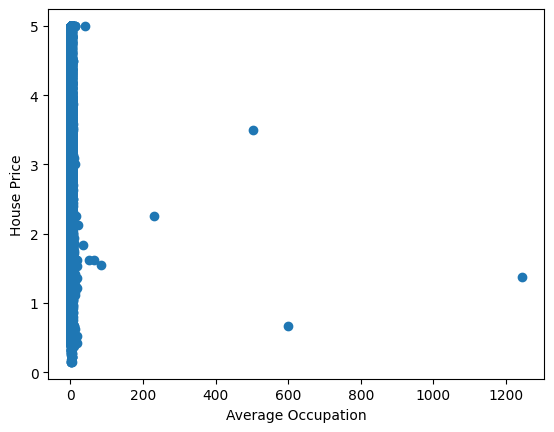

In [9]:
plt.scatter(california_df["AveOccup"], california_df["Price"])
plt.xlabel("Average Occupation")
plt.ylabel("House Price")

In [11]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\CODING PRACTICES\machine-learning\california-house-price-prediction\pred\Scripts\python.exe -m pip install --upgrade pip' command.


<Axes: xlabel='MedInc', ylabel='Price'>

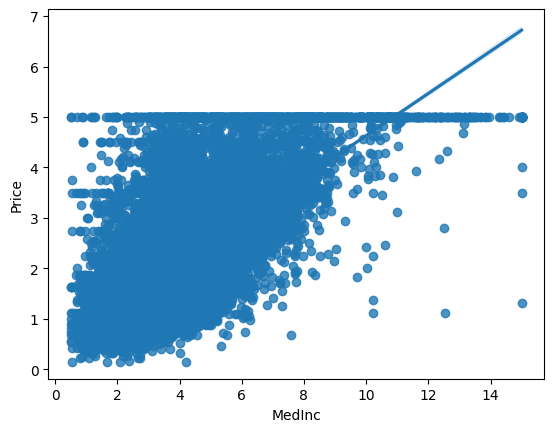

In [12]:
import seaborn as sns
sns.regplot(x="MedInc", y="Price", data=california_df)

<Axes: xlabel='AveOccup', ylabel='Price'>

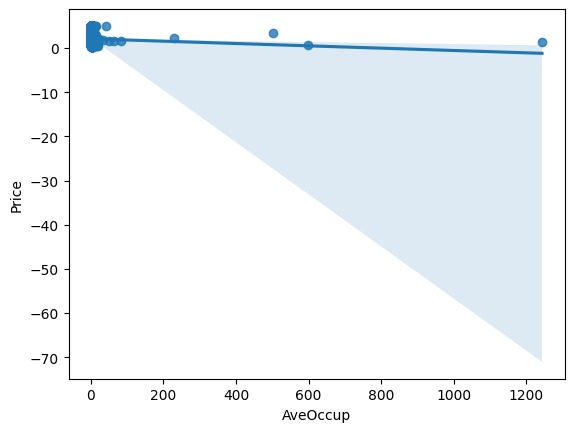

In [13]:
sns.regplot(x="AveOccup", y="Price", data=california_df)

<Axes: xlabel='Population', ylabel='Price'>

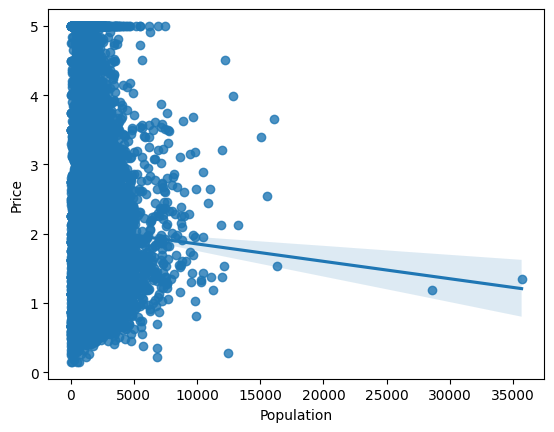

In [14]:
sns.regplot(x="Population", y="Price", data=california_df)

In [15]:
##Getting all dependent and independent features

X= california_df.iloc[:, :-2]
y = california_df.iloc[:, -1]
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64

In [16]:
##Split the entire dataset ino test,and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [17]:
##Standardizing the dataset so that they can converge faster and have the same scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)


In [19]:
X_test = scaler.transform(X_test)

In [21]:
import pickle
pickle.dump(scaler, open('scaling.pkl', 'wb'))

In [22]:
X_train

array([[ 0.13350629,  0.50935748,  0.18106017, ..., -0.18411678,
        -0.01082519, -0.80568191],
       [-0.53221805, -0.67987313, -0.42262953, ..., -0.37619075,
        -0.08931585, -1.33947268],
       [ 0.1709897 , -0.36274497,  0.07312833, ..., -0.61124018,
        -0.04480037, -0.49664515],
       ...,
       [-0.49478713,  0.58863952, -0.59156984, ...,  0.28773617,
         0.01720102, -0.75885816],
       [ 0.96717102, -1.07628333,  0.39014889, ...,  0.30615422,
         0.00482125,  0.90338501],
       [-0.68320166,  1.85715216, -0.82965604, ...,  1.0446304 ,
        -0.0816717 ,  0.99235014]])

## Model Training

In [138]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [139]:
regression.fit(X_train, y_train)

LinearRegression()

In [141]:
## Checking the coeficients
print(regression.coef_)

[ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]


In [143]:
##Prediction with test data (At the moment, X_test)
pred = regression.predict(X_test)
pred

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

## Assumptions - Plots for analysis

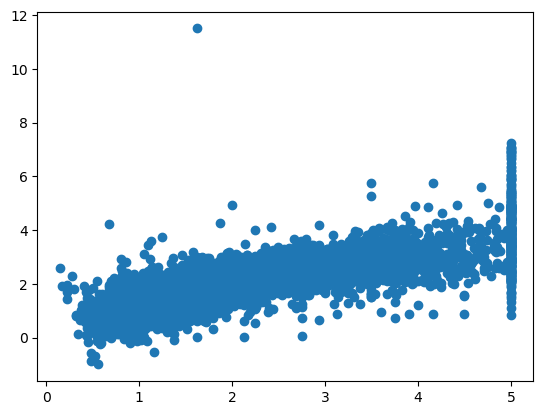

In [144]:
##We are going to compare the predictions along with the true values using scatter plot
plt.scatter(y_test, pred)


In [145]:
#Residuals - Error of the model. Meaning the difference between true value and predicted value
residuals = y_test - pred
residuals

20046   -0.249049
3024    -1.309434
15663    2.289088
20484   -0.649147
9814     0.173042
           ...   
17505    0.155059
13512   -0.237516
10842    0.109345
16559   -0.379714
5786     0.270559
Name: Price, Length: 6192, dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


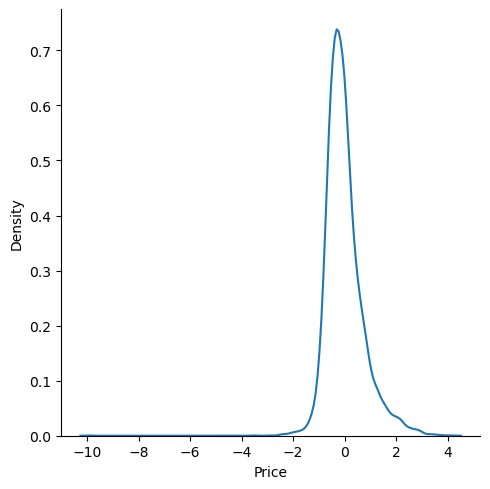

In [147]:
##Ploting the residuals
sns.displot(residuals, kind="kde")

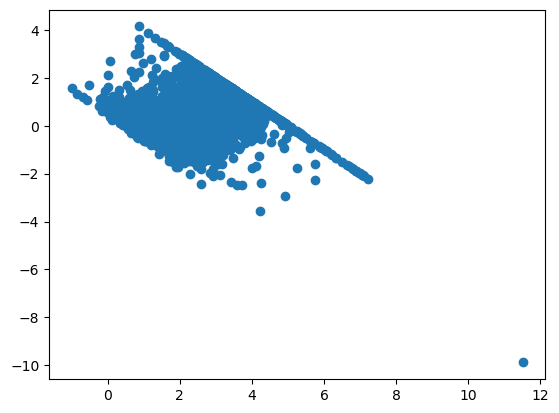

In [149]:
##Plot with respect to the predictions and residuals
##It should be uniform distributed
plt.scatter(pred, residuals)

In [153]:
##Performance metrics - error functions
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test, pred))
print(mean_absolute_error(y_test, pred))
print(np.sqrt(mean_squared_error(y_test, pred)))

0.5305677824766752
0.527247453830595
0.7284008391515452


## R square and adjusted R

In [162]:
from sklearn.metrics import r2_score
score=r2_score(y_test, pred)
print(score)

0.5957702326061665


In [163]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5952472117200027

## New data prediction

In [169]:
california.data[0].reshape(1, -1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [170]:
## Standardization of the new data
scaler.transform(california.data[0].reshape(1, -1))

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [180]:
## doing the prediction
regression.predict(scaler.transform(california.data[0].reshape(1, -1)))

array([84.33102212])

## Picling the model for deployment

In [182]:
import pickle

pickle.dump(regression, open('regmodel.pkl', 'wb'))

In [185]:
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))
pickled_model.predict(scaler.transform(california.data[0].reshape(1, -1)))

array([84.33102212])